## Лабораторная работа №1 | Вариант 4

Выполнил: Баулкин Данир М8О-312Б-23

### 1. Numpy

In [6]:
import numpy as np

1. Найти индексы не нулевых элементов массива [1,2,0,0,4,0]

In [ ]:
arr = [1, 2, 0, 0, 4, 0]
nonzero_index = np.nonzero(arr)[0]
print(nonzero_index)


2. Создайте единичную матрицу размером 3х3

In [ ]:
import numpy as np
np.diag([1, 1, 1])

3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [19]:
small_square = np.array([[0,1], [1,0]])
desk = np.tile(small_square, (4,4))
print(desk)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


4. Дан 1D массив, удалите все элементы которые входят в диапазон `[3, 8]` inplace

In [ ]:
arr = [0, 4, 4, 2, 1, 4, 8, 7, 10, 15]
arr[:] = [x for x in arr if ((x < 3) or (x > 8))]
print(arr)

5. Создайте случайный вектор размером 10 элементов и замените максимальный элемент на 0

In [16]:
vector = np.random.rand(10)
max_index = np.argmax(vector)
vector[max_index] = 0
print(vector)

[0.3343012  0.92776061 0.1932613  0.47292371 0.43828439 0.
 0.37658913 0.56825816 0.44706451 0.30308015]


6. Как распечатать все значения в массиве?

In [17]:
print(list(vector))
print(vector.tolist())

[np.float64(0.3343011955176515), np.float64(0.9277606089385677), np.float64(0.19326130342709302), np.float64(0.4729237076816041), np.float64(0.43828439470576896), np.float64(0.0), np.float64(0.3765891253287259), np.float64(0.5682581587206228), np.float64(0.44706450622322247), np.float64(0.3030801518197066)]
[0.3343011955176515, 0.9277606089385677, 0.19326130342709302, 0.4729237076816041, 0.43828439470576896, 0.0, 0.3765891253287259, 0.5682581587206228, 0.44706450622322247, 0.3030801518197066]


7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [ ]:
import numpy as np
np.random.seed(228)
points = np.random.rand(100, 2)

diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
distances = np.sqrt(np.sum(diff**2, axis=2))
distances_from_first = np.sqrt(np.sum((points[0] - points)**2, axis=1))
np.fill_diagonal(distances, np.inf)
nearest_indexs = np.argmin(distances, axis=1)
nearest_distances = distances[np.arange(100), nearest_indexs]

8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [14]:
import numpy as np

arr = np.array([1.1, 2.2, 3.3, -4.8], dtype=np.float32)
arr[:] = arr.astype(np.int32)
print(arr)

[ 1.  2.  3. -4.]


9. Как прочитать заданный файл?
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [ ]:
import numpy as np
np.genfromtxt('file.txt', delimiter=',')

FileNotFoundError: file not found.

10. Какой эквивалент enumerate для numpy массивов?

In [ ]:
np.ndenumerate

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Файл: `russian-housing-market.csv`

```
price_doc - Цена продажи
id - Id транзакции
timestamp - Дата транзакции
full_sq - суммарная площадь в квадратных метрах, включая лоджию, валконы и отдельные нежилые помещения
life_sq - жилая площаль в квадратных метрах, исключая лоджии, балконы и прочие нежилые помещения
floor - для апартаментов, этаж помещения
max_floor - количество этажей в здании
material - материал стен
build_year - год постройки
num_room - количество жилых комнат
kitch_sq - площадь кухни
state - состояние апартаментов
product_type - покупка или инвестиция собственника-арендатора
sub_area - название района
```

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("russian-housing-market.csv")

1. Посчитайте количество записей в датасете с отсутствующей информацией о жилой площади жилого помещения

In [3]:
print(data['life_sq'].isna().sum())

6383


2. Предложите способ заменить отсутствующие значения из пункта 1 и реализуйте его. Способ нужно аргументировать(сказать почему это достаточно хорошее приближение)

In [4]:
data[['life_sq', 'full_sq']].interpolate()

,life_sq,full_sq
0,27.0,43
1,19.0,34
2,29.0,43
3,50.0,89
4,77.0,77
...,...,...
30466,27.0,44
30467,59.0,86
30468,45.5,45
30469,32.0,64


3. Какие значения имеет 25, 50 и 75 перцентили полной площади помещения

In [5]:
print(data['full_sq'].quantile([0.25, 0.5, 0.75]))

0.25    38.0
0.50    49.0
0.75    63.0
Name: full_sq, dtype: float64


4. Посчитайте среднюю стоимость продажи помещений с общей площадью от 50 до 70 квадратных метров

In [6]:
filtered_data = data[(data['full_sq'] >= 50) & (data['full_sq'] <= 70)]
average_price = filtered_data['price_doc'].mean()

5. Какая максимальная этажность здания представлена в датасете

In [7]:
data['max_floor'].max()

np.float64(117.0)

6. Выявите район с самым дорогим жильем

In [8]:
rich = data.loc[data['price_doc'].idxmax(), 'sub_area']
richest_district = (data.groupby('sub_area')['price_doc'].mean()).idxmax

7. Посчитайте среднюю стоимость за квадратный метр жилья в Митино(Mitino)

In [9]:
mitino = data[data['sub_area'] == 'Mitino'].copy()
mean_price = (mitino['price_doc']/mitino['full_sq']).mean()

8. Посчитайте среднюю площадь комнаты в Бибирево

In [10]:
biberevo = data[data['sub_area'] == 'Bibirevo']
mean_area = (biberevo['life_sq']/biberevo['num_room']).mean()

9. Проанализируйте есть ли разница в цене между квартирами на 1 и 9 этажах

In [11]:
floor1 = data[data['floor'] == 1]['price_doc'].median()
floor9 = data[data['floor'] == 9]['price_doc'].median()
delta = floor1 - floor9
if (delta > 0):
  print(f'Квартиры на 1 этаже дороже на {abs(delta)}')
else:
  print(f'Квартиры на 9 этаже дороже на {abs(delta)}')

Квартиры на 9 этаже дороже на 830425.0


10. Найдите минимальную стоимость квартиры с жилой площадью не менее 60 квадратных метров, не менее чем 3мя комнатами и не ниже чем на 5 этаже

In [12]:
min_price = data[(data['life_sq'] >= 60) & (data['num_room'] >= 3) & (data['floor'] >= 5)]['price_doc'].min()

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Как менялась средняя цена квартиры в Нагатинском Затоне(Nagatinski Zaton) с течением времени

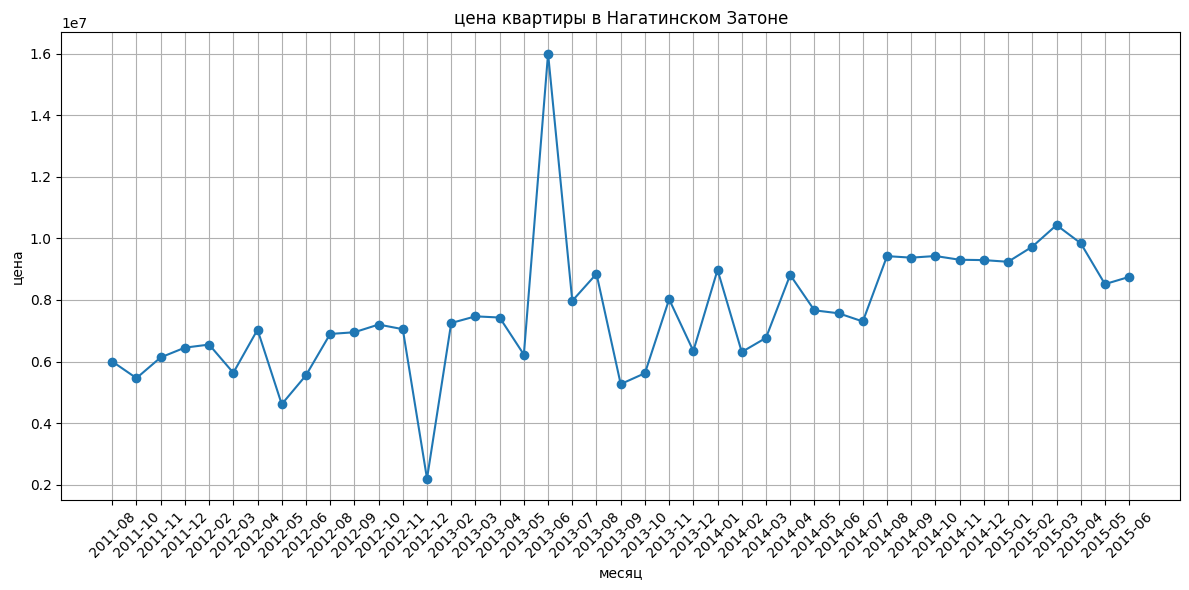

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv("russian-housing-market.csv")

nagatinski_zaton = data[data['sub_area'] == "Nagatinskij Zaton"].copy()
nagatinski_zaton['timestamp'] = pd.to_datetime(nagatinski_zaton['timestamp'])
nagatinski_zaton['year_month'] = nagatinski_zaton['timestamp'].dt.to_period('M')
prices = nagatinski_zaton.groupby('year_month')['price_doc'].mean()

plt.figure(figsize=(12, 8))
plt.plot(prices.index.astype(str), prices.values, marker='o')
plt.title('цена квартиры в Нагатинском Затоне', fontsize=12)
plt.xlabel('месяц')
plt.ylabel('цена')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

2. Постройте гистограмму распределения цен на квартиры с общей площадью более 50 кв.метров

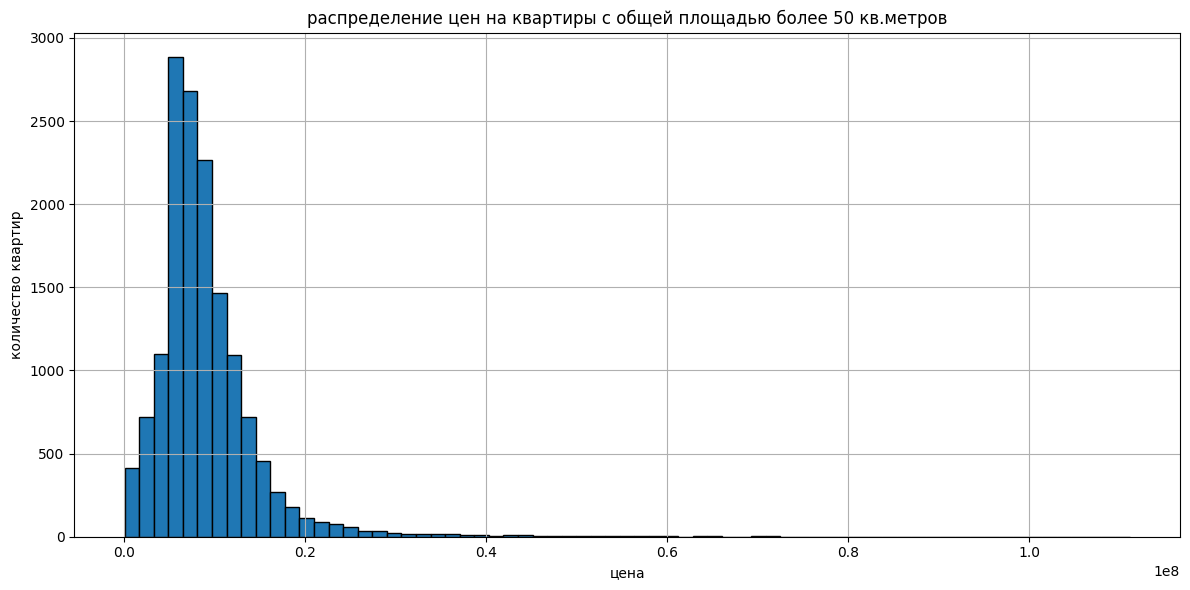

In [ ]:
apartments = data[data.full_sq > 50]
plt.figure(figsize=(12, 8))
plt.hist(apartments['price_doc'], bins = 69, edgecolor='black')
plt.title('распределение цен на квартиры с общей площадью более 50 кв.метров', fontsize=12)
plt.xlabel('цена')
plt.ylabel('количество квартир')
plt.grid(True)
plt.tight_layout()
plt.show()

3. Визуализируйте количество проданных квартир в разных районах

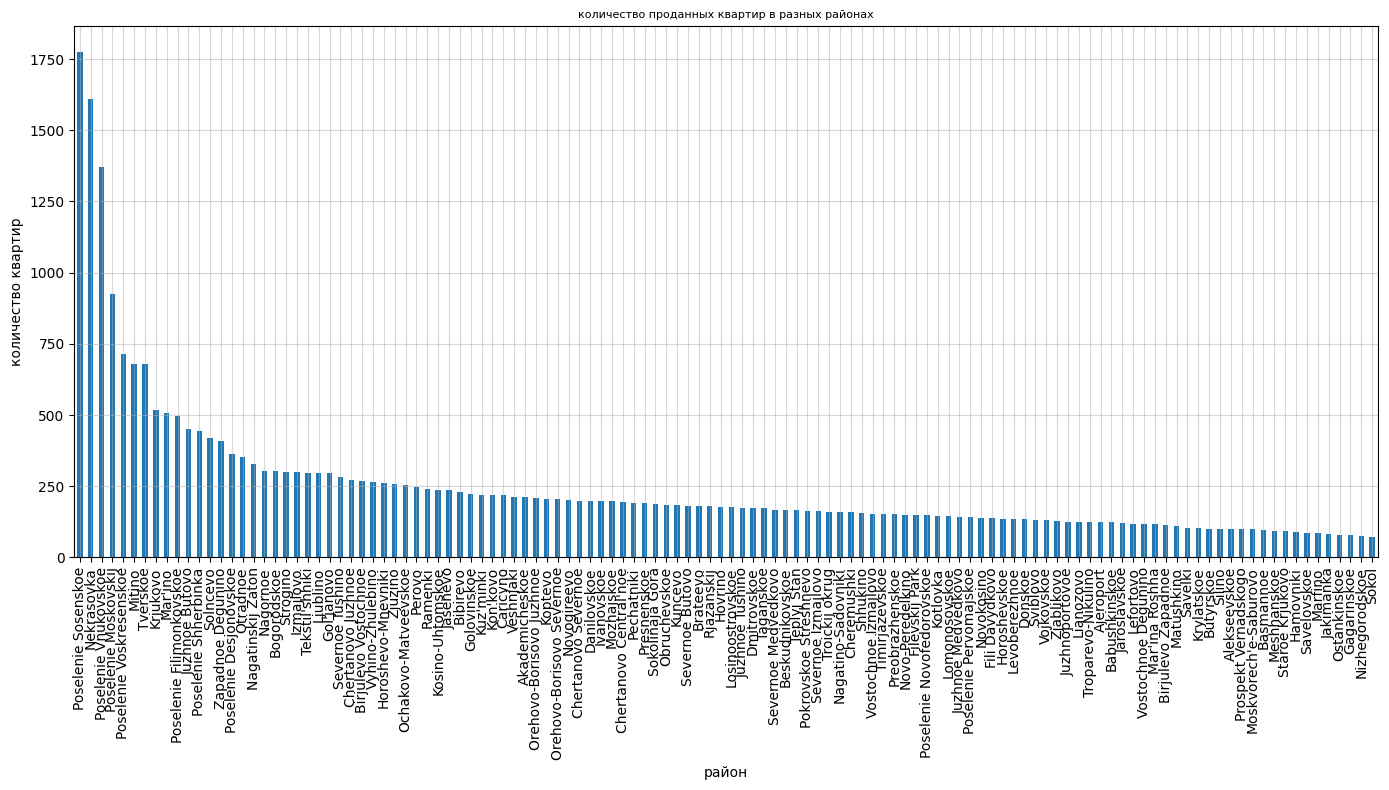

In [45]:
counts = data['sub_area'].value_counts()
plt.figure(figsize=(14, 8))
counts.head(120).plot(kind='bar')
plt.title('количество проданных квартир в разных районах', fontsize=8)
plt.xlabel('район')
plt.ylabel('количество квартир')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

4. Постройте box plot отображающий распределение полных площадей квартир в Басманном районе

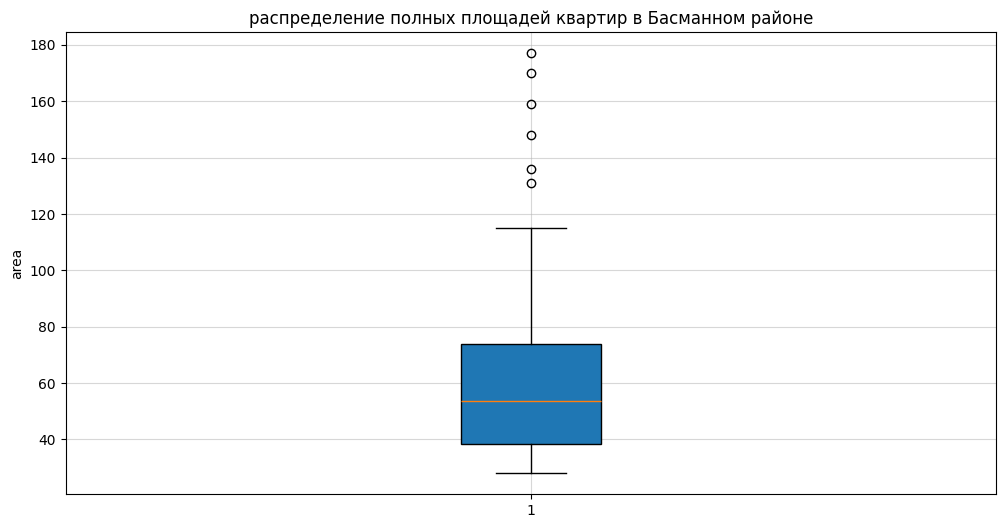

In [ ]:
basmanni = data[data['sub_area'] == 'Basmannoe']

plt.figure(figsize=(12, 8))
plt.boxplot(basmanni['full_sq'], patch_artist=True)
plt.title('распределение полных площадей квартир в Басманном районе', fontsize=12)
plt.ylabel('area')
plt.grid(True, alpha=0.5)
plt.show()

5. Визуализируйте зависимость средней стоимости квартир в зависимости от этажа

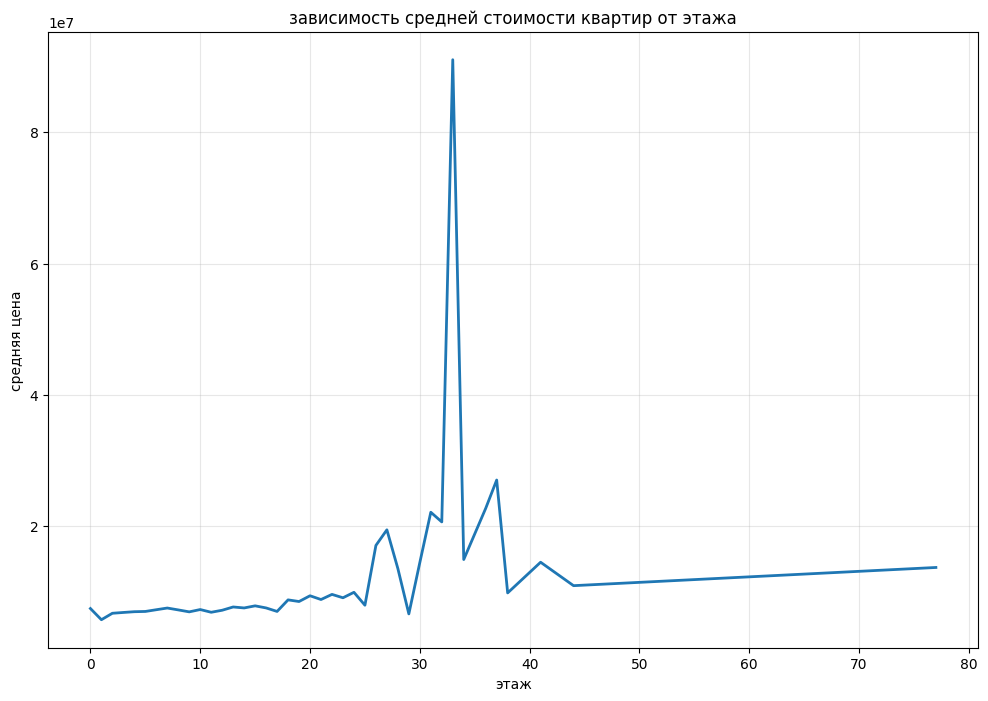

In [ ]:
floor_prices = data.groupby('floor')['price_doc'].mean()

plt.figure(figsize=(12, 8))
plt.plot(floor_prices.index, floor_prices.values, linewidth=2, markersize=4)
plt.title('зависимость средней стоимости квартир от этажа')
plt.xlabel('этаж')
plt.ylabel('cредняя цена')
plt.grid(True, alpha=0.5)
plt.show()

6. Покажите как меняется средняя площадь квартир в зависимости от района

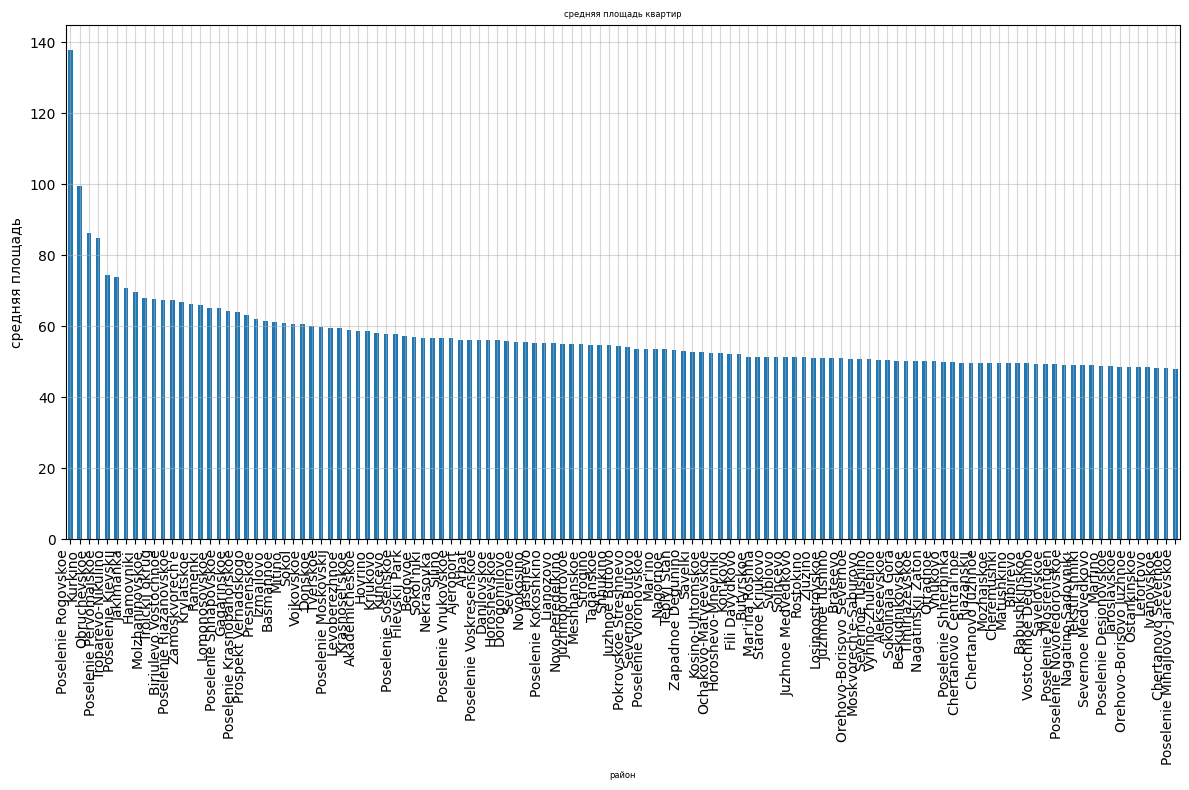

In [52]:
areas = data.groupby('sub_area')['full_sq'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
areas.head(120).plot(kind='bar')
plt.title('средняя площадь квартир', fontsize=6)
plt.xlabel('район', fontsize = 6)
plt.ylabel('средняя площадь')
plt.xticks(rotation=90, ha='right')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

7. Постройте график изменения медианной цены на квартиру менее 50 кв. метров за период с 2011 до 2014 года*

\* Задание на доп. балл

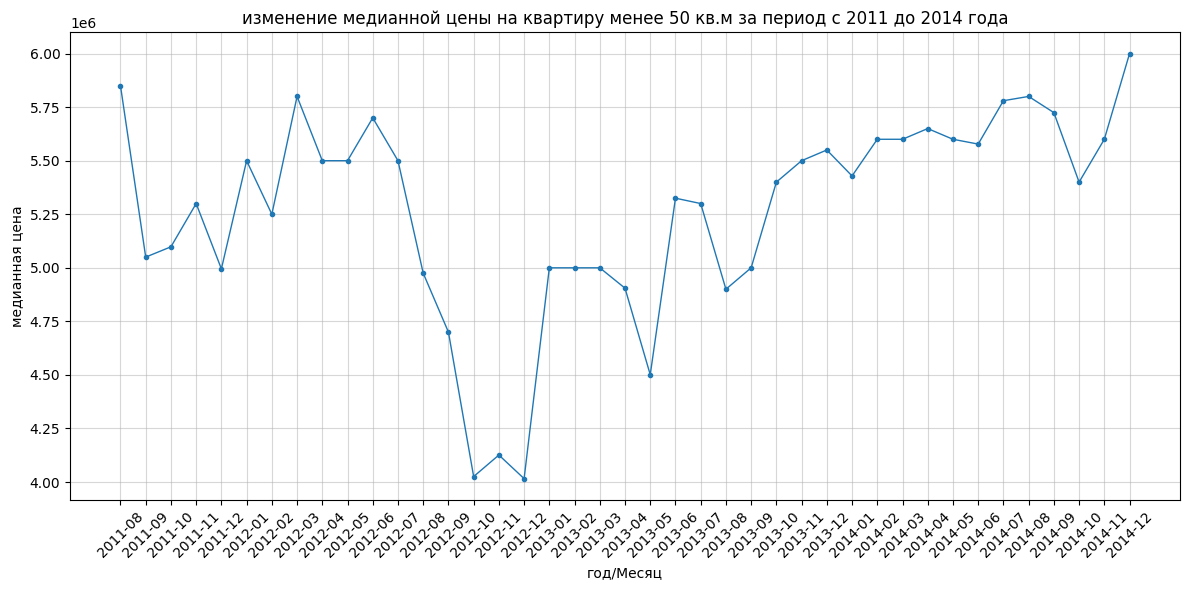

In [54]:
apart = data[data['full_sq'] < 50].copy()
apart['timestamp'] = pd.to_datetime(apart['timestamp'])
apart['year'] = apart['timestamp'].dt.year
apart_filtered = apart[apart['year'].between(2011, 2014)].copy()
apart_filtered['year_month'] = apart_filtered['timestamp'].dt.to_period('M')
median_prices = apart_filtered.groupby('year_month')['price_doc'].median()

plt.figure(figsize=(12, 6))
plt.plot(median_prices.index.astype(str), median_prices.values, marker='o', linewidth=1, markersize=3,)
plt.title('изменение медианной цены на квартиру менее 50 кв.м за период с 2011 до 2014 года', fontsize=12)
plt.xlabel('год/Месяц')
plt.ylabel('медианная цена')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()